In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')



**Load and preview the dataset.**

In [ ]:
data = pd.read_csv('/content/US_Customer_Insights_Dataset.csv')
data.head()

CustomerID              Name       State    Education      Gender  Age  \
0  CUST10319       Scott Perez     Florida  High School  Non-Binary   47   
1  CUST10695   Jennifer Burton  Washington       Master        Male   72   
2  CUST10297   Michelle Rogers     Arizona       Master      Female   40   
3  CUST10103  Brooke Hendricks       Texas       Master        Male   27   
4  CUST10219       Karen Johns       Texas  High School      Female   28   

  Married  NumPets JoinDate TransactionDate  MonthlySpend  \
0     Yes        1  9/19/21          9/2/24       1281.74   
1     Yes        0   4/5/24          6/2/24        429.46   
2     Yes        2  7/24/24         2/28/25        510.34   
3     Yes        0  8/12/23         3/29/25        396.47   
4     Yes        1  12/6/21         7/24/22        139.68   

   DaysSinceLastInteraction  
0                       332  
1                       424  
2                       153  
3                       124  
4                      1103

**Check data types, unique values, and presence of nulls.**

In [ ]:
data.nunique()

CustomerID                  1000
Name                         990
State                         10
Education                      5
Gender                         3
Age                           63
Married                        2
NumPets                        5
JoinDate                     731
TransactionDate             1605
MonthlySpend                9843
DaysSinceLastInteraction    1605
dtype: int64

In [ ]:
data.isnull().sum()

CustomerID                  0
Name                        0
State                       0
Education                   0
Gender                      0
Age                         0
Married                     0
NumPets                     0
JoinDate                    0
TransactionDate             0
MonthlySpend                0
DaysSinceLastInteraction    0
dtype: int64

**Understand which variables are categorical and which are numerical.**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CustomerID                10675 non-null  object 
 1   Name                      10675 non-null  object 
 2   State                     10675 non-null  object 
 3   Education                 10675 non-null  object 
 4   Gender                    10675 non-null  object 
 5   Age                       10675 non-null  int64  
 6   Married                   10675 non-null  object 
 7   NumPets                   10675 non-null  int64  
 8   JoinDate                  10675 non-null  object 
 9   TransactionDate           10675 non-null  object 
 10  MonthlySpend              10675 non-null  float64
 11  DaysSinceLastInteraction  10675 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 1000.9+ KB


** Step 2: Descriptive Statistics
Business Purpose: Describe your customer base — how old are they, how much do they spend, are they active **

**Compute:
Mean, median, std dev for Age, MonthlySpend, DaysSinceLastInteraction
Mode for categorical variables: Gender, Education, Married**

In [ ]:
data['JoinDate'] = pd.to_datetime(data['JoinDate'])
data['TransactionDate'] = pd.to_datetime(data['TransactionDate'])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10675 entries, 0 to 10674
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   CustomerID                10675 non-null  object        
 1   Name                      10675 non-null  object        
 2   State                     10675 non-null  object        
 3   Education                 10675 non-null  object        
 4   Gender                    10675 non-null  object        
 5   Age                       10675 non-null  int64         
 6   Married                   10675 non-null  object        
 7   NumPets                   10675 non-null  int64         
 8   JoinDate                  10675 non-null  datetime64[ns]
 9   TransactionDate           10675 non-null  datetime64[ns]
 10  MonthlySpend              10675 non-null  float64       
 11  DaysSinceLastInteraction  10675 non-null  int64         
dtypes: datetime64[ns](

In [ ]:
avg_monthly_spend = data['MonthlySpend'].mean()
print("Average Monthly Spend:", round(avg_monthly_spend, 2))

Average Monthly Spend: 331.61


In [ ]:
age = data['Age'].mean()
print('Avrage age' , round(age))

Avrage age 49


In [ ]:
numerical_cols = ['Age', 'MonthlySpend', 'DaysSinceLastInteraction']
print("Descriptive statistics for numerical columns:")
display(data[numerical_cols].agg(['mean', 'median', 'std']))



Descriptive statistics for numerical columns:


Age  MonthlySpend  DaysSinceLastInteraction
mean    49.474567    331.610315                538.469883
median  49.000000    282.110000                445.000000
std     18.221365    225.799253                398.766747

In [ ]:
categorical_cols = ['Gender', 'Education', 'Married']
print("\nMode for categorical columns:")
for col in categorical_cols:
    print(f"{col}: {data[col].mode()[0]}")


Mode for categorical columns:
Gender: Male
Education: Master
Married: No


**Step 3: Data Visualization
Business Purpose: Reveal patterns that numbers alone can’t show.**

**Plot histograms and boxplots for Age, MonthlySpend**

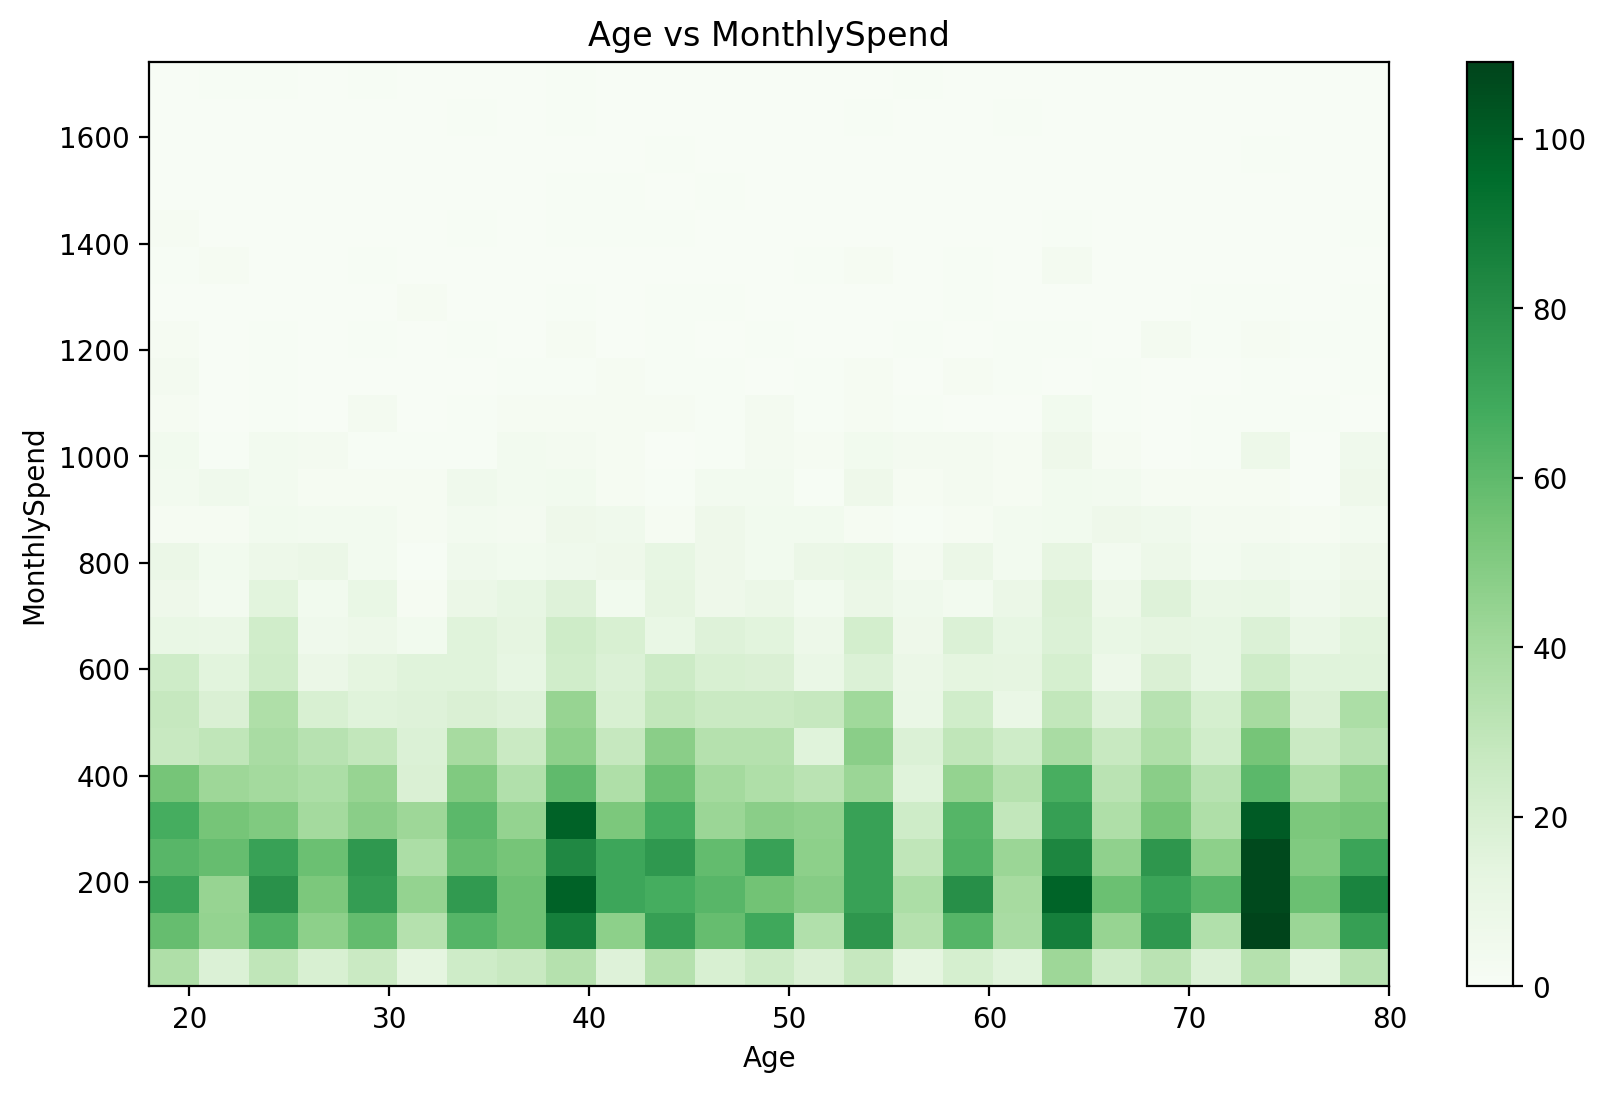

In [ ]:
plt.figure(figsize=(10,6) , dpi = 200)
plt.hist2d(data['Age'] ,data['MonthlySpend'] , bins = 25, cmap = 'Greens')
plt.colorbar()
plt.xlabel('Age')
plt.ylabel('MonthlySpend')
plt.title('Age vs MonthlySpend')
plt.show()

In [ ]:
data.nunique()

CustomerID                  1000
Name                         990
State                         10
Education                      5
Gender                         3
Age                           63
Married                        2
NumPets                        5
JoinDate                     731
TransactionDate             1605
MonthlySpend                9843
DaysSinceLastInteraction    1605
dtype: int64

**Create a bar chart for Gender, Education, State**

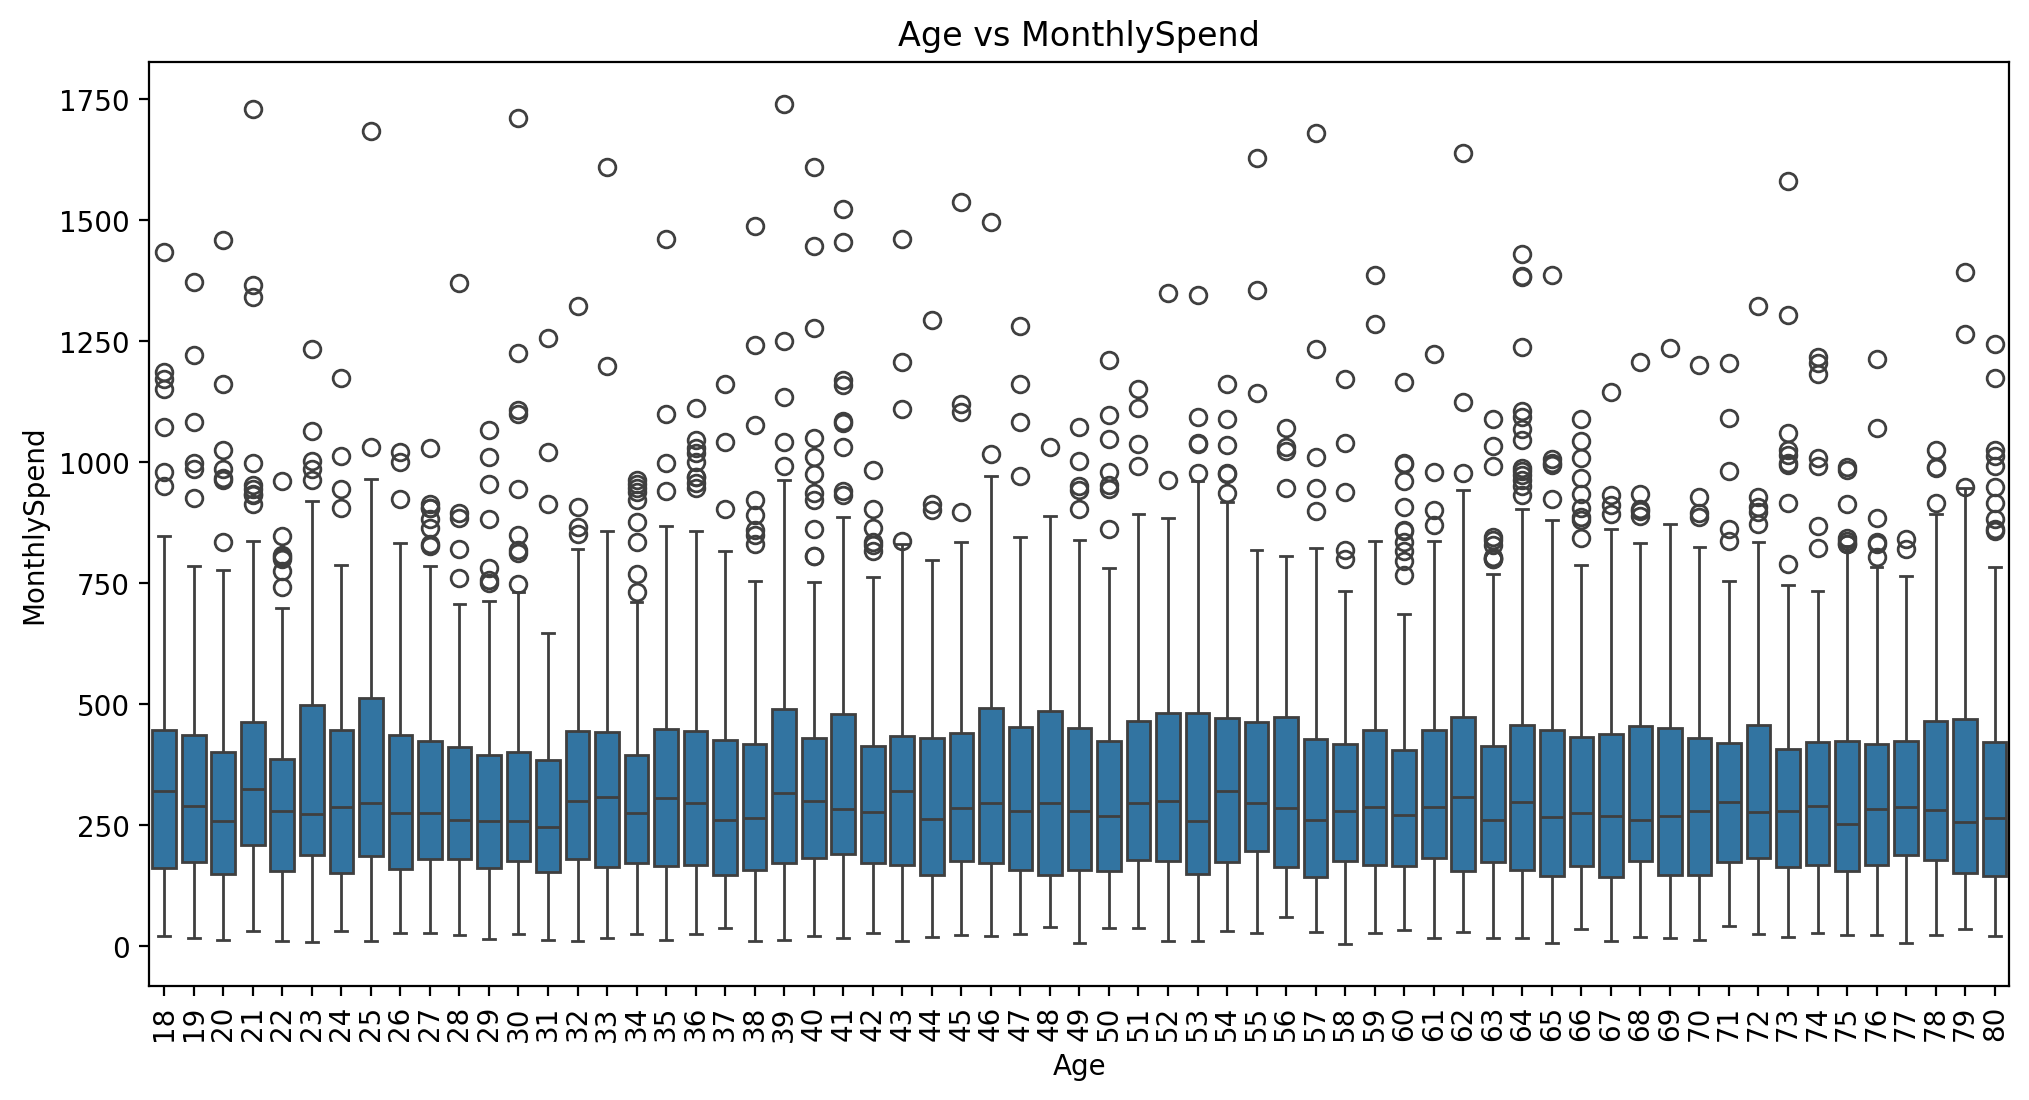

In [ ]:
plt.figure(figsize=(12,6) , dpi =200)
sns.boxplot(y = 'MonthlySpend' , x = 'Age' , data = data)
plt.xlabel('Age')
plt.ylabel('MonthlySpend')
plt.title('Age vs MonthlySpend')
plt.xticks(rotation = 90)
plt.show()

**Create a bar chart for Gender, Education, State**

In [ ]:
plt.figure(figsize= (12,6) , dpi = 200)
sns.countplot(x='Gender' , data= data , hue = 'Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

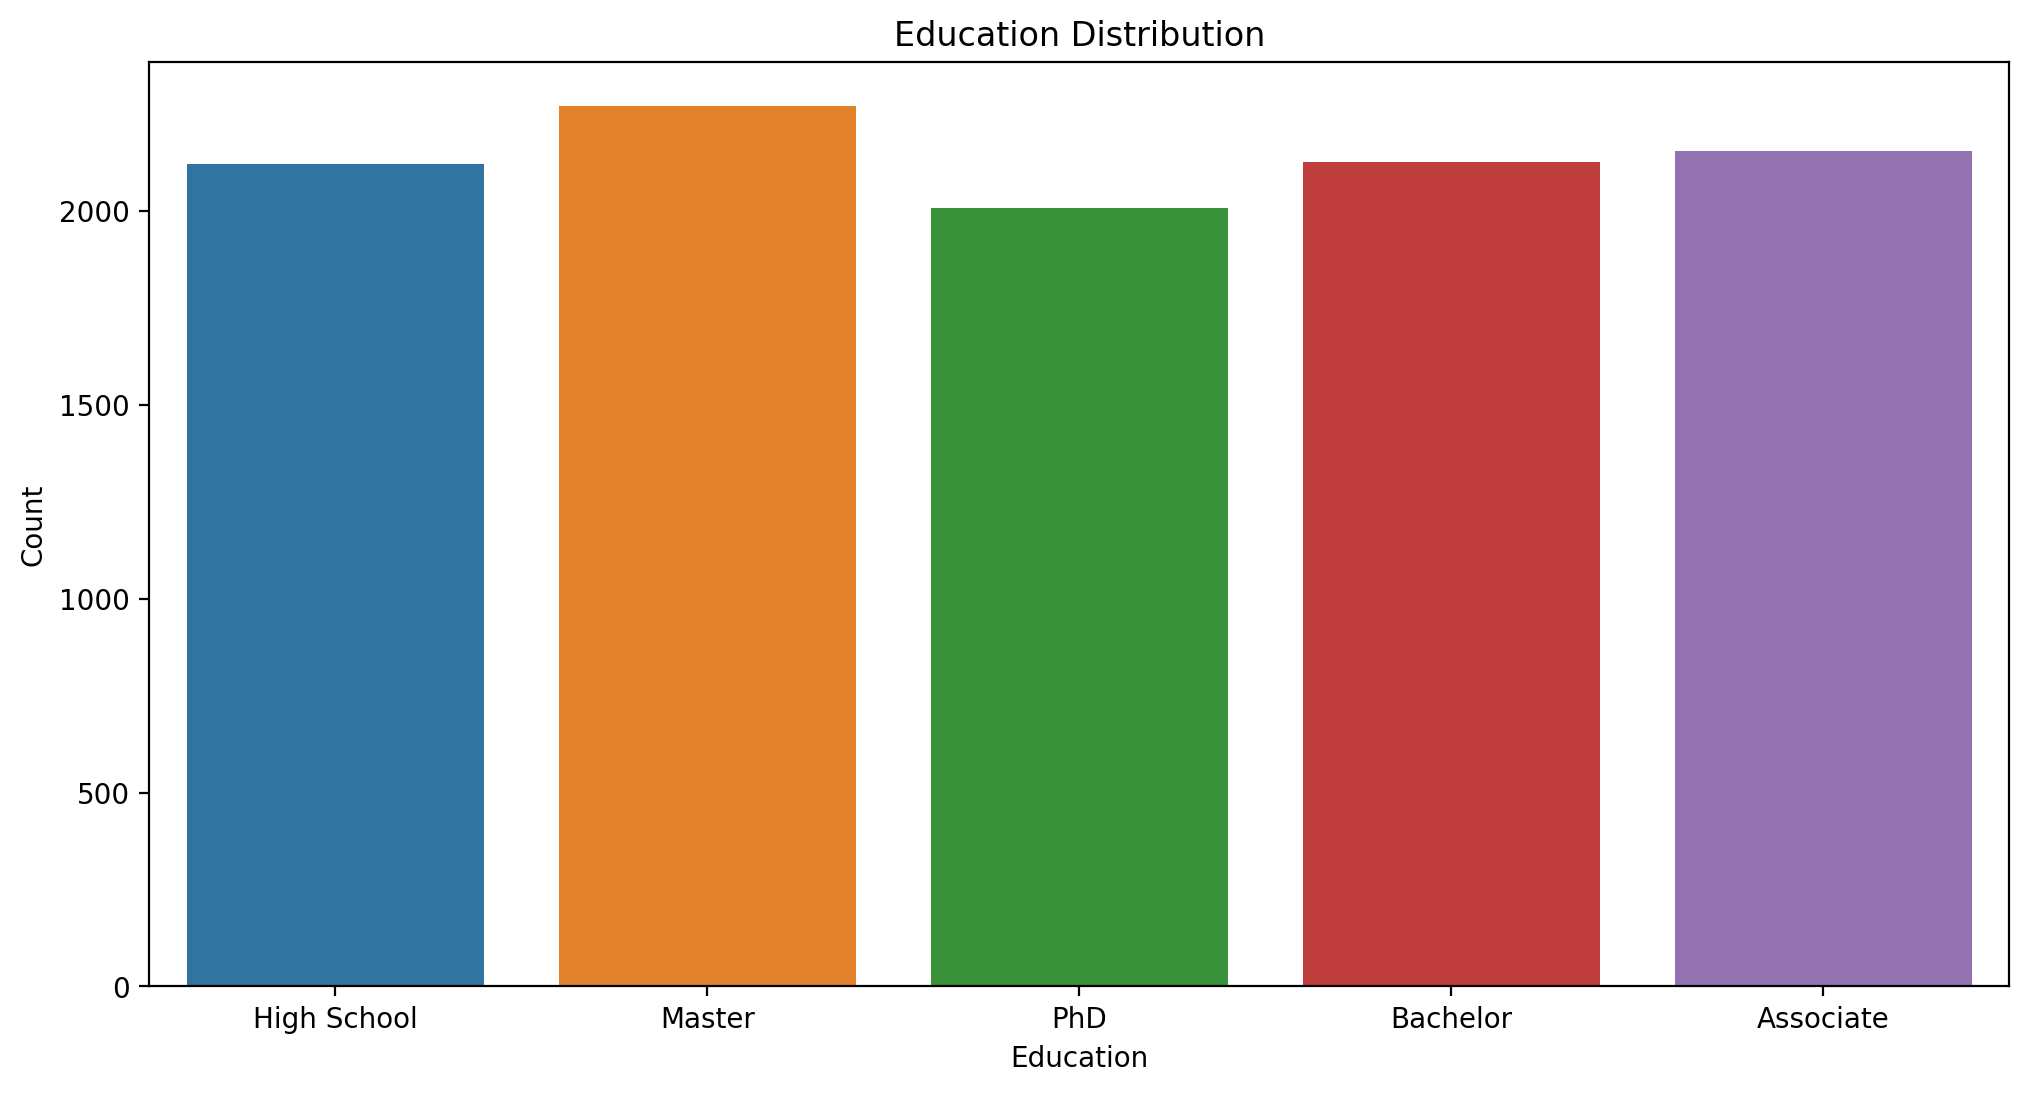

In [ ]:
plt.figure(figsize= (12,6) , dpi = 200 )
sns.countplot(x='Education' , data= data , hue = 'Education')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Education Distribution')
plt.show()

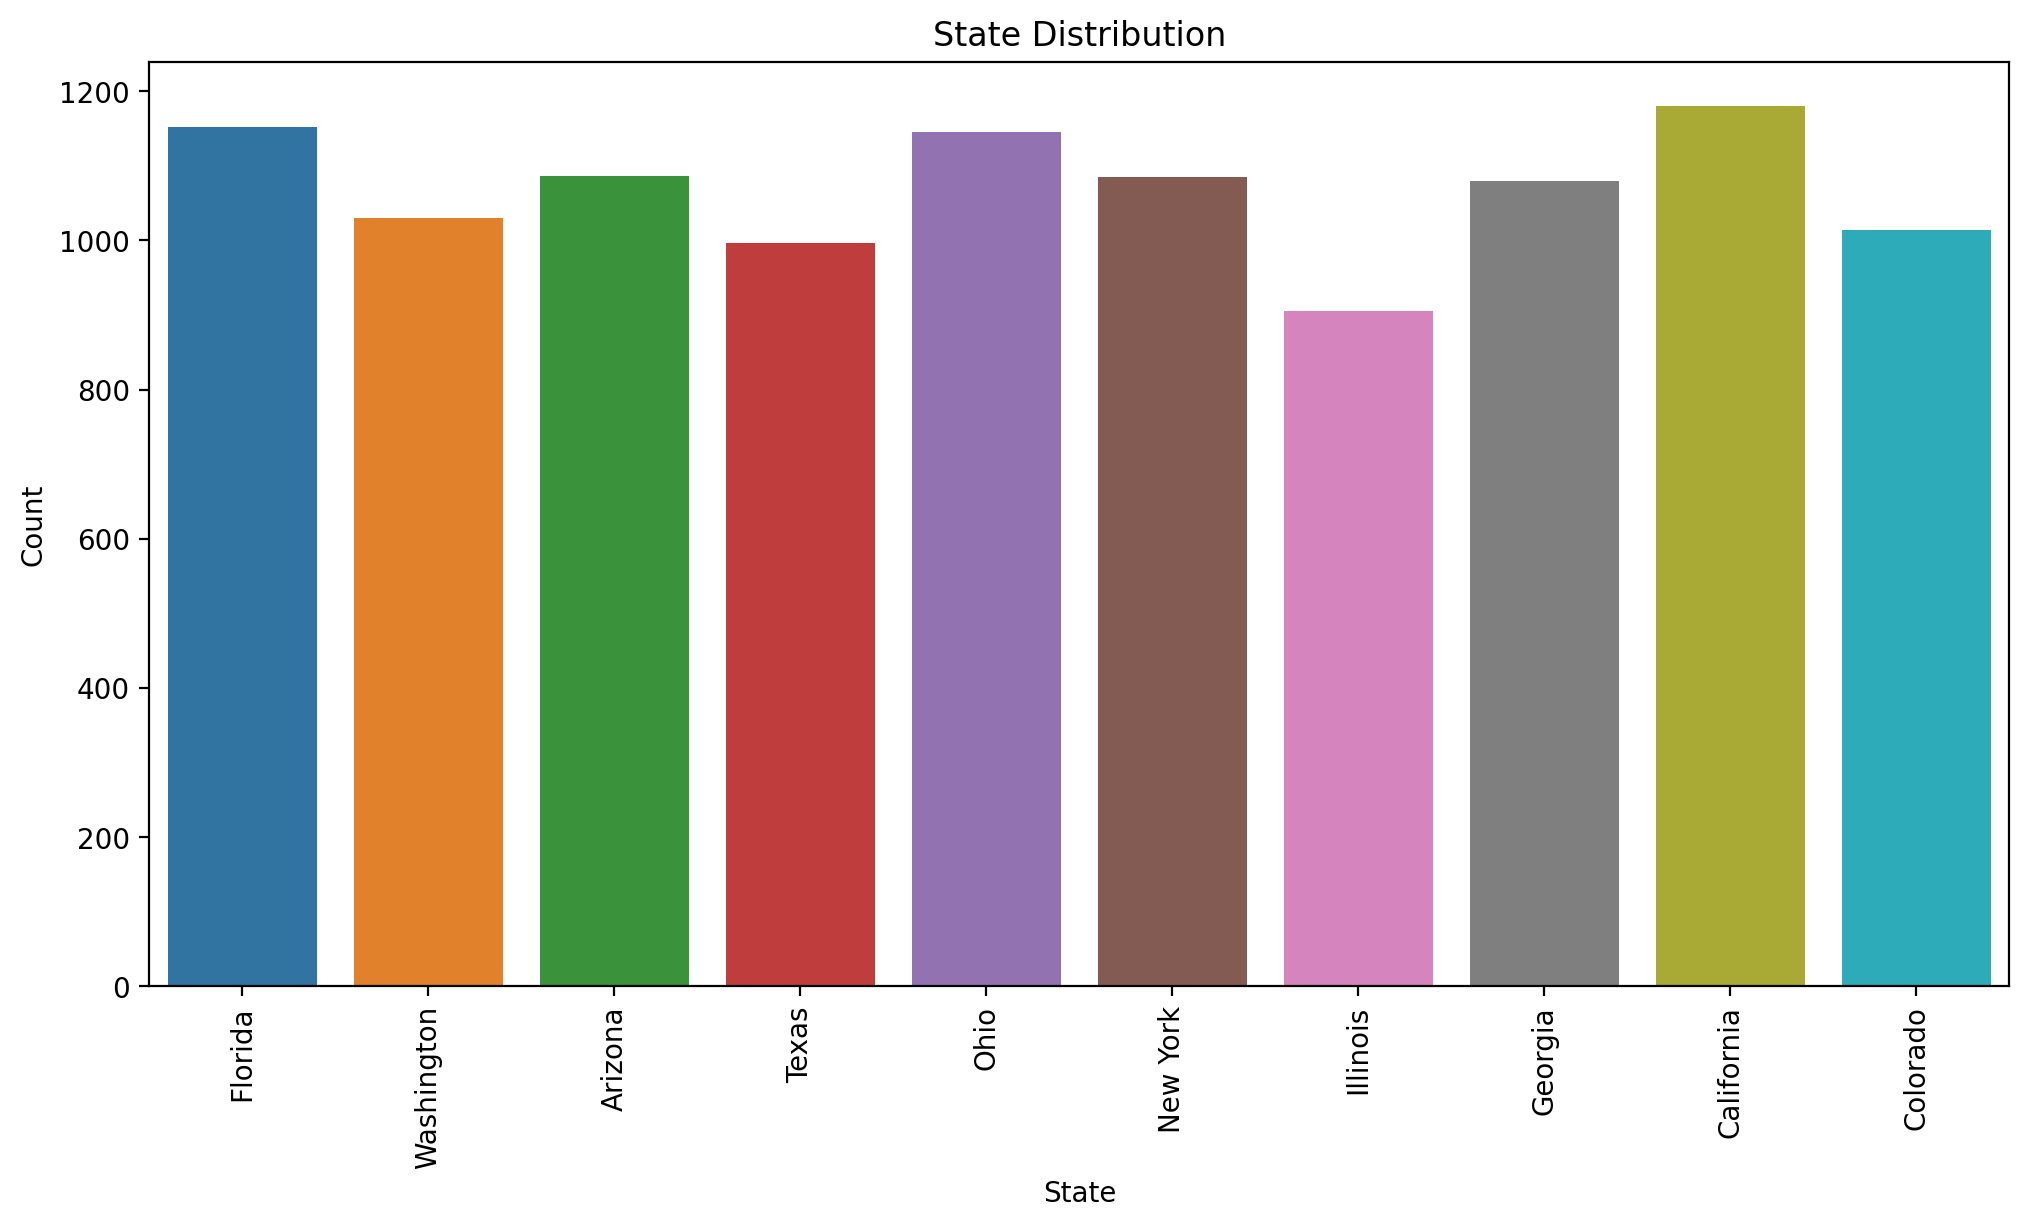

In [ ]:
plt.figure(figsize=(12,6) , dpi = 200)
sns.countplot(x='State' , data= data , hue = 'State')
plt.xlabel('State')
plt.ylabel('Count')
plt.title('State Distribution')
plt.xticks(rotation = 90)
plt.show()

**Scatterplot: Age vs MonthlySpend**

Text(0.5, 1.0, 'Age vs Monthly Spend')

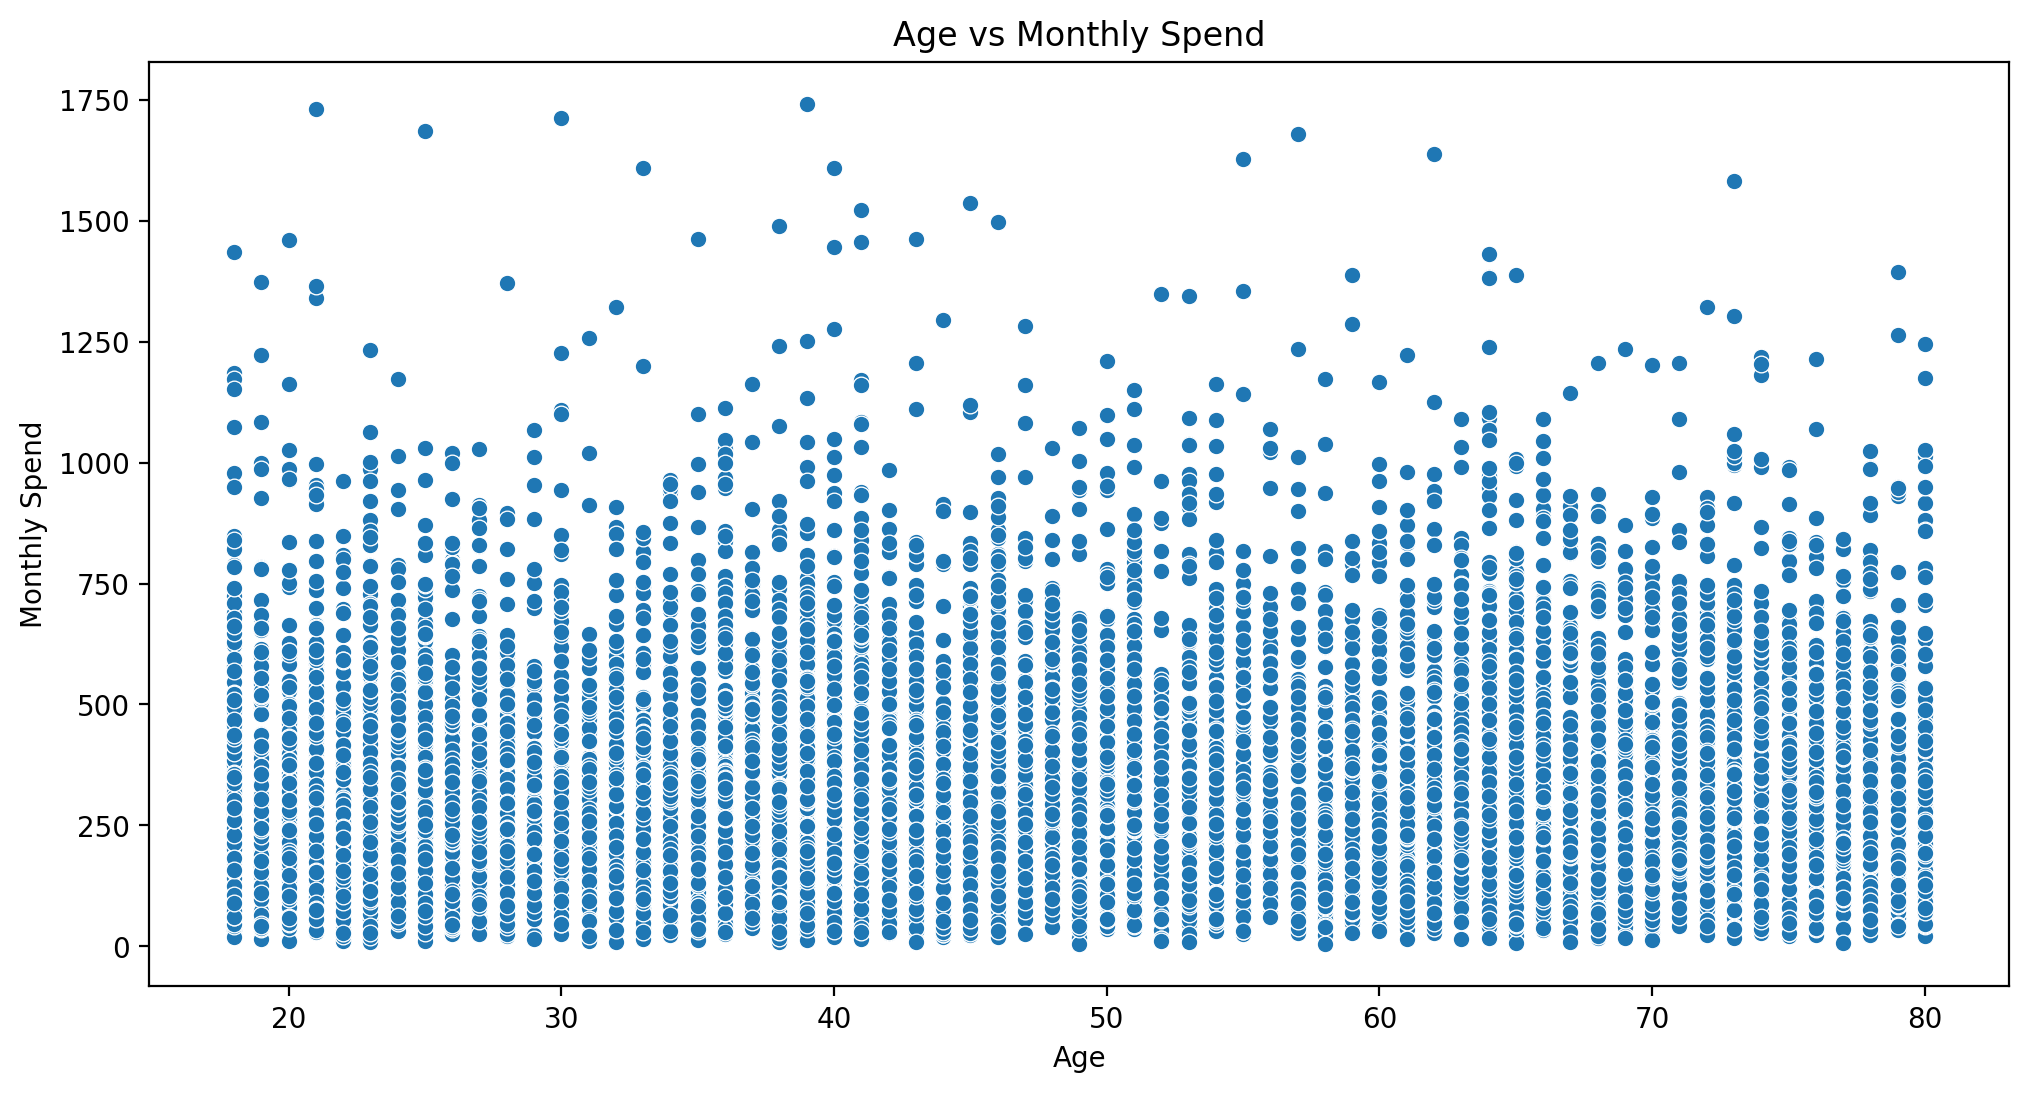

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
sns.scatterplot(x='Age', y='MonthlySpend', data=data )
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.title('Age vs Monthly Spend')

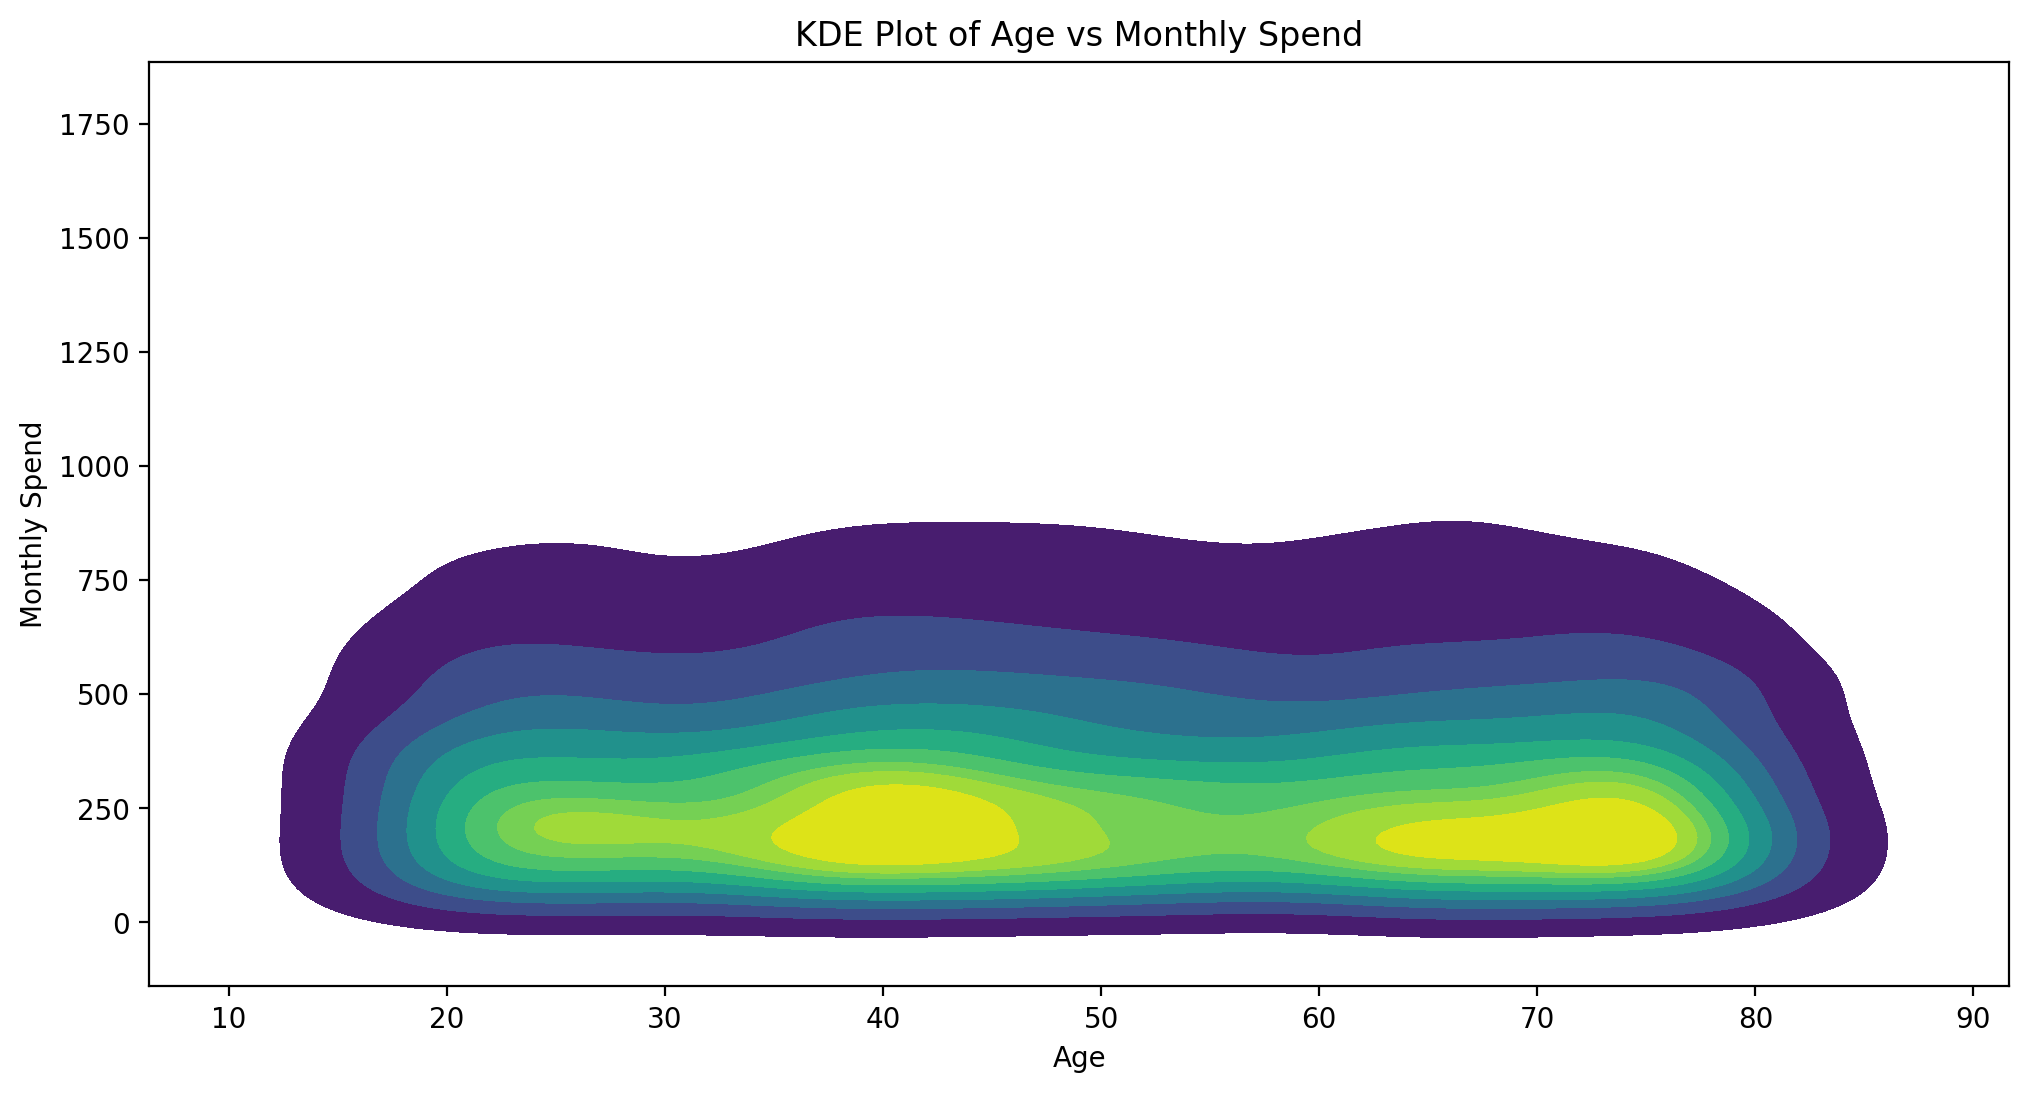

In [ ]:
plt.figure(figsize=(12, 6), dpi=200)
sns.kdeplot(x='Age', y='MonthlySpend', data=data, fill=True, cmap='viridis')
plt.xlabel('Age')
plt.ylabel('Monthly Spend')
plt.title('KDE Plot of Age vs Monthly Spend')
plt.show()

**KDE: Spending behavior by education level or marital status**

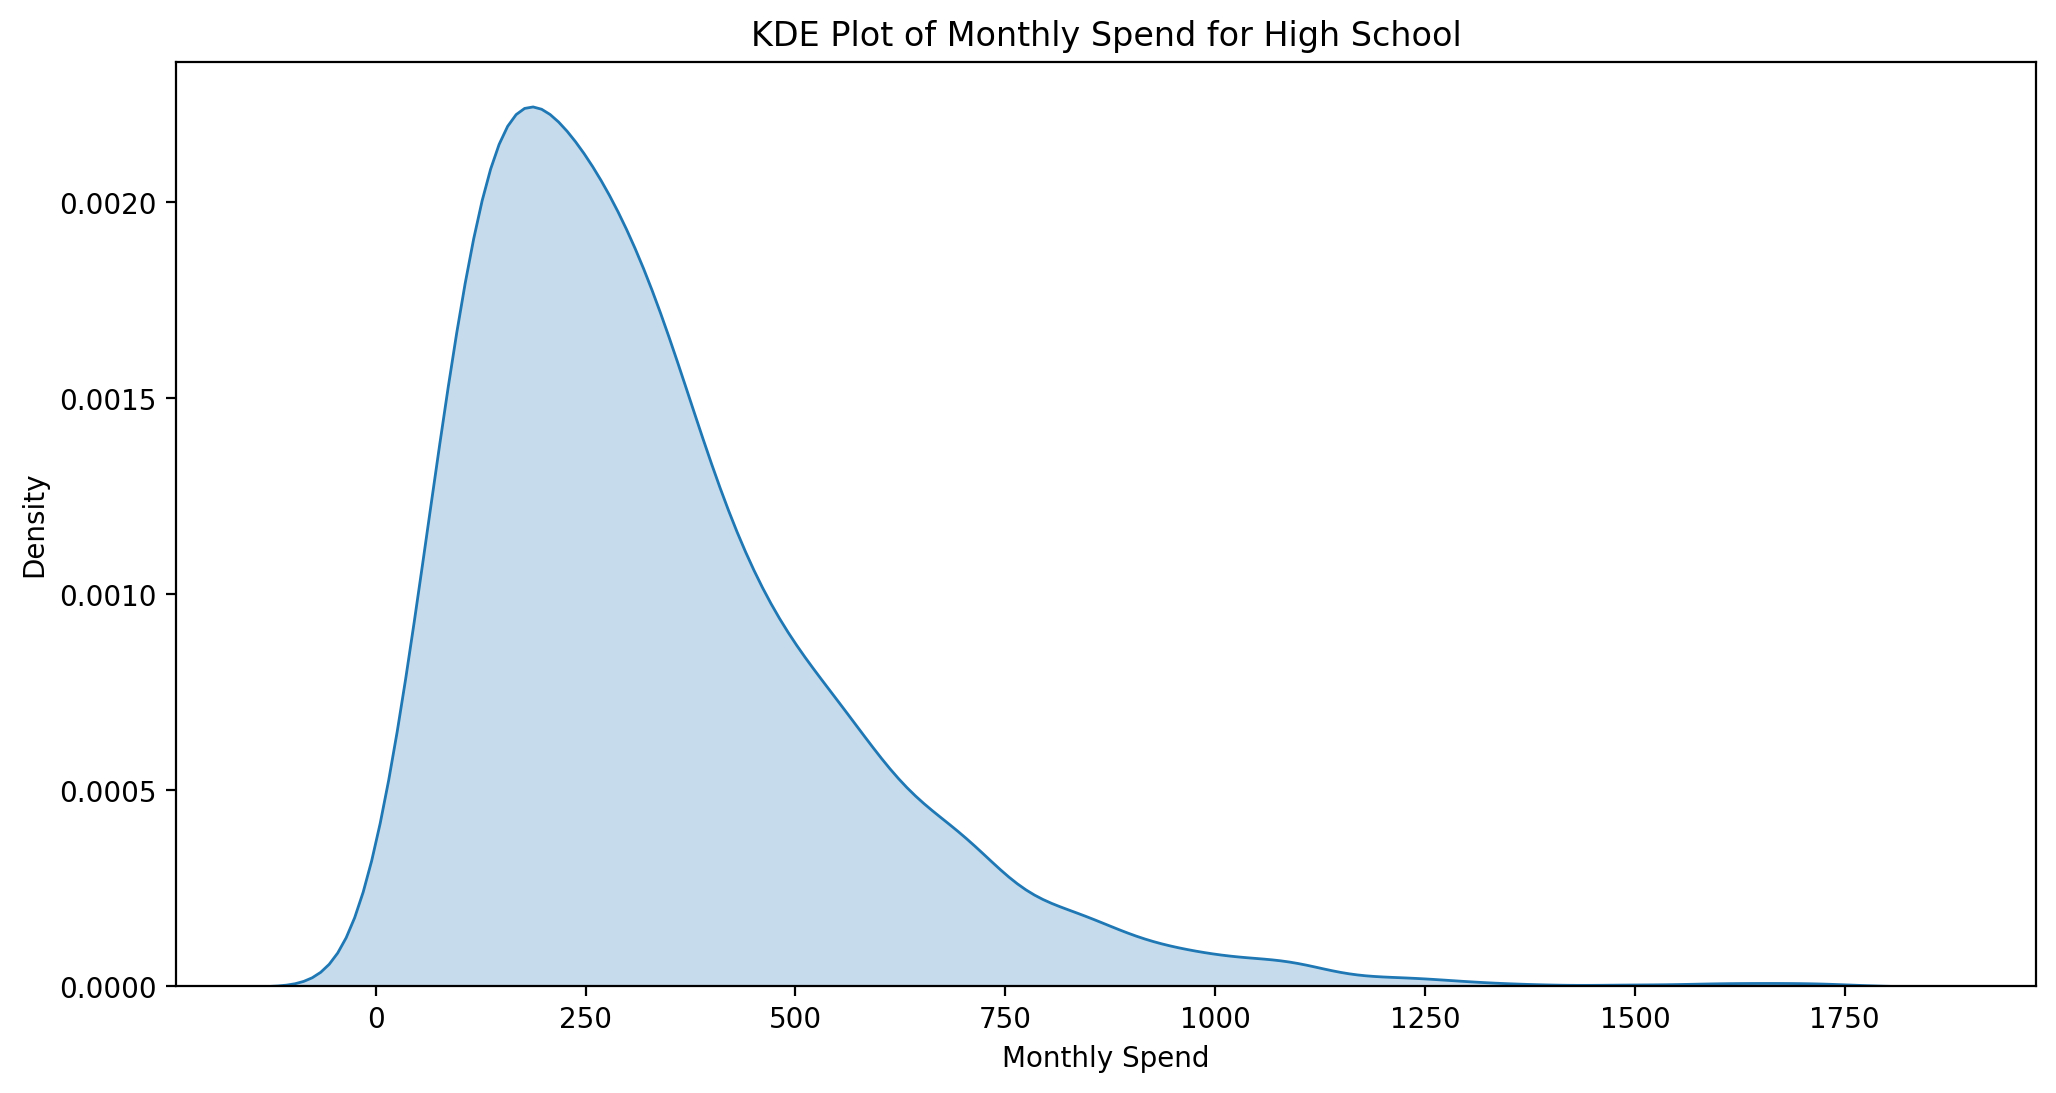

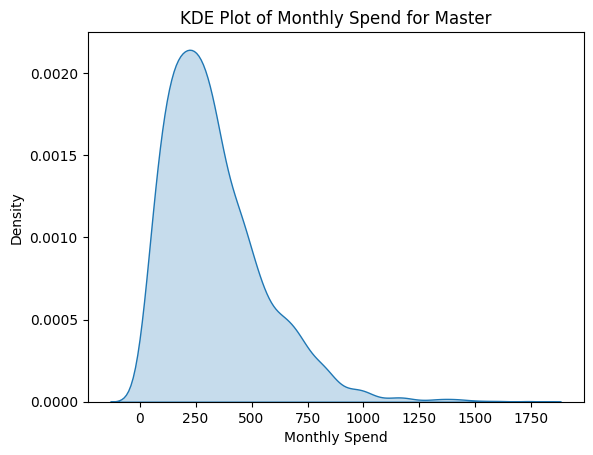

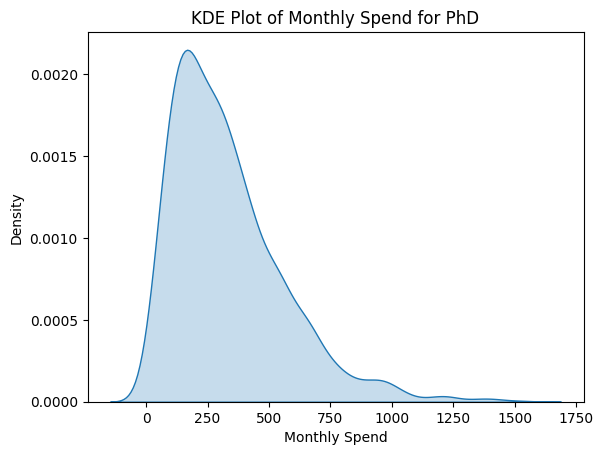

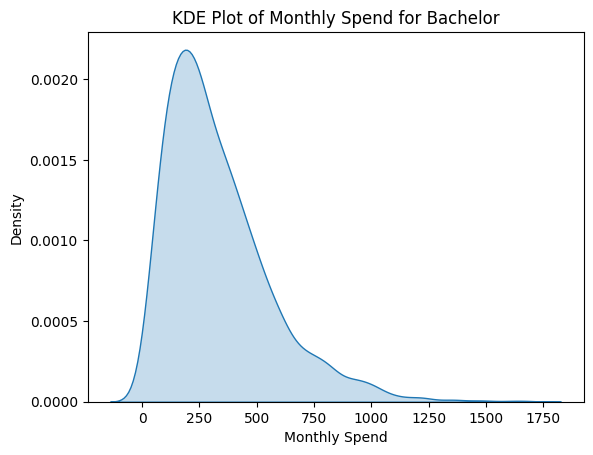

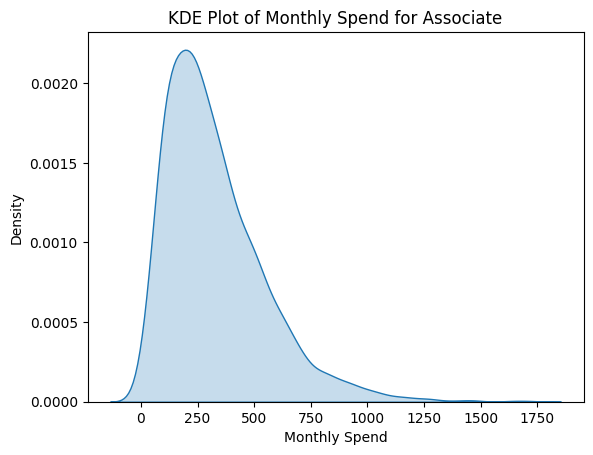

In [ ]:
plt.figure(figsize=(12,6),dpi=200)
for education in data['Education'].unique():
  education_data = data[data['Education'] == education]

  sns.kdeplot(education_data['MonthlySpend'] , fill =True , cmap='viridis')
  plt.xlabel('Monthly Spend')
  plt.ylabel('Density')
  plt.title(f'KDE Plot of Monthly Spend for {education}')
  plt.show()

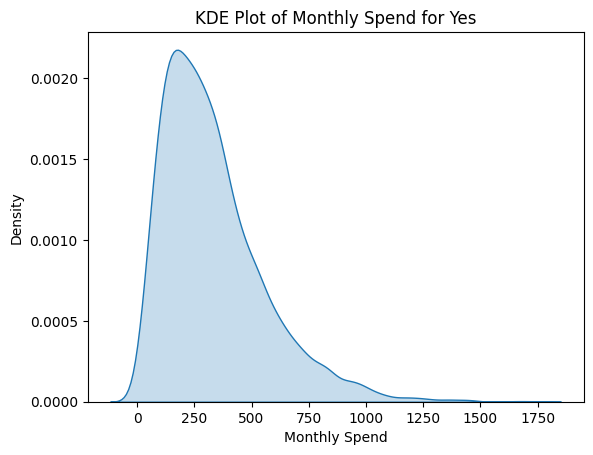

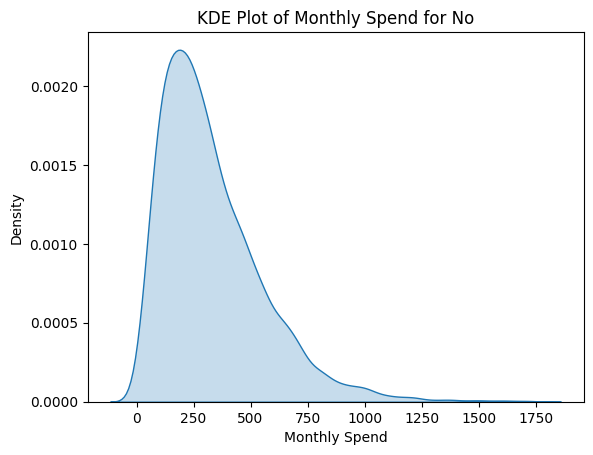

In [ ]:

for married in data['Married'].unique():

  married_data = data[data['Married'] == married ]

  sns.kdeplot(married_data['MonthlySpend'] , fill = True)
  plt.xlabel('Monthly Spend')
  plt.ylabel('Density')
  plt.title(f'KDE Plot of Monthly Spend for {married}')
  plt.show()

**Step 4: Bivariate Analysis
Business Purpose: Check how customer attributes relate to one another.**

**Correlation matrix (numeric variables)**

In [ ]:
corelation_metrix = data[numerical_cols].corr()
print(corelation_metrix)

                               Age  MonthlySpend  DaysSinceLastInteraction
Age                       1.000000     -0.012323                 -0.003970
MonthlySpend             -0.012323      1.000000                  0.006081
DaysSinceLastInteraction -0.003970      0.006081                  1.000000


**Crosstab of Gender vs Married**

In [ ]:
crosstab_gender_married = pd.crosstab(data['Gender'] , data['Married'])
crosstab_gender_married

Married       No   Yes
Gender                
Female      1797  1616
Male        1892  1899
Non-Binary  1894  1577

***Grouped stats: average MonthlySpend by State, Education, Gender***

In [ ]:
state_spend = data.groupby('State')['MonthlySpend'].mean().sort_values(ascending = False)
state_spend

State
Arizona       341.489135
Ohio          340.187860
California    339.183492
Illinois      332.589591
New York      332.151244
Washington    329.444078
Georgia       328.354648
Florida       327.696892
Colorado      323.083462
Texas         319.506770
Name: MonthlySpend, dtype: float64

In [ ]:
education_spend = data.groupby('Education')['MonthlySpend'].mean().sort_values(ascending = False)
education_spend

Education
Master         334.252305
High School    332.215712
Bachelor       331.884753
PhD            331.690090
Associate      327.884408
Name: MonthlySpend, dtype: float64

In [ ]:
gender_spend = data.groupby('Gender')['MonthlySpend'].mean().sort_values(ascending = False)
gender_spend

Gender
Male          333.174068
Female        331.361310
Non-Binary    330.147240
Name: MonthlySpend, dtype: float64

**Step 5 & 6: Formulate Hypotheses
Business Purpose: Turn business questions into statistical tests.**

**Run Hypothesis Tests
Business Purpose: Validate or reject your assumptions with confidence.
Define null and alternate hypotheses
Choose test based on data types
Check assumptions: normality, independence, homogeneity of variance
Interpret p-values and confidence intervals**

**Business Question
Statistical Test

Do males and females spend differently?
Independent t-test

Does education level impact average monthly spend?
One-way ANOVA

Is marital status related to the number of pets owned? [Only for DS Students]
Chi-square test

Are older people less active?
Correlation (Age vs DaysSinceLastInteraction)

Does state-wise spend vary significantly?
ANOVA**

In [ ]:

import scipy.stats as stats

In [ ]:
male_spend = data[data['Gender'] == 'Male' ] ['MonthlySpend']
female_spend = data[data['Gender'] == 'Female'] ['MonthlySpend']
t_stat , p_value = stats.ttest_ind(male_spend , female_spend)
print('T-statistic:' , t_stat)
print('P-value:' , p_value)

if p_value < 0.05:
  print('There is a significant difference in monthly spend between males and females.')
else:
  print('There is no significant difference in monthly spend between males and females.')


T-statistic: 0.3391730320232445
P-value: 0.7344892727022859
There is no significant difference in monthly spend between males and females.


In [ ]:
education_group = [data[data['Education'] == lavel]['MonthlySpend'] for lavel in data['Education'].unique()]
f_stat , p_value = stats.f_oneway(*education_group)
print('F-statistic:' , f_stat)
print('P-value:' , p_value)

if p_value < 0.05:
  print('There is a significant difference in monthly spend between education levels.')
else:
  print('There is no significant difference in monthly spend between education levels.')

F-statistic: 0.22880668673709162
P-value: 0.922359467759936
There is no significant difference in monthly spend between education levels.


In [ ]:
contigency_table = pd.crosstab(data['Married'] , data['NumPets'])
chi2 , p_value , dof , expected = stats.chi2_contingency(contigency_table)
print('Chi-square statistic:' , chi2)
print('P-value:' , p_value)
print('Degrees of freedom:' , dof)
print('Expected frequencies:')
print(expected)

if p_value < 0.05:
  print('There is a significant association between marital status and the number of pets.')
else:
  print('There is no significant association between marital status and the number of pets.')

Chi-square statistic: 177.63953668537033
P-value: 2.3957232932397494e-37
Degrees of freedom: 4
Expected frequencies:
[[1592.00487119 1676.20749415 1436.15156909  578.95840749  299.67765808]
 [1451.99512881 1528.79250585 1309.84843091  528.04159251  273.32234192]]
There is a significant association between marital status and the number of pets.


In [ ]:
corr , p_value = stats.pearsonr(data['Age'] , data['DaysSinceLastInteraction'])
print('Correlation coefficient:' , corr)
print('P-value:' , p_value)
if p_value < 0.05 :
  if corr > 0 :
    print("older people are less active , positive corelation with days since last interaction ")
  else:
    print("older people are more active , negative corelation with days since last interaction")

else:
  print('There is no significant correlation between age and days since last interaction.')

Correlation coefficient: -0.003970230104955049
P-value: 0.681690543730101
There is no significant correlation between age and days since last interaction.


In [ ]:
top_stats = data['State'].value_counts().head(5).index
group_stats = [data[data['State'] == stats]['MonthlySpend'] for stats in top_stats]
f_stat , p_value = stats.f_oneway(*group_stats)
print('F-statistic:' , f_stat)
print('P-value:' , p_value)
if p_value < 0.05:
  print('There is a significant difference in monthly spend between the top 5 states.')
else:
  print('There is no significant difference in monthly spend between the top 5 states.')

F-statistic: 0.7447376572503299
P-value: 0.5613974942416722
There is no significant difference in monthly spend between the top 5 states.


**Step 7: Present Business Insights
Business Purpose: Translate stats into strategy.
Create 4–5 takeaways. For example:
“Customers with Master’s degrees spend 18% more per month on average.”
“Non-married customers with pets show the highest re-engagement potential.”
“Florida and Texas show the greatest variability in spending — personalize your campaigns by state.”**

In [ ]:
high_schoole_spend = education_spend.get('High School' , 0)
master_spend = education_spend.get('Master' , 0)
phd_spend = education_spend.get('PhD' , 0)
over_all_avg = data['MonthlySpend'].mean()

if master_spend > 0 :
  master_premium = ((master_spend - over_all_avg) / over_all_avg ) * 100
  print(f"master degre holers spend {master_premium : .1f} % more than the average customer")

master degre holers spend  0.8 % more than the average customer


In [ ]:
married_npet = data[data['Married'] == 'Yes' ]['NumPets'].mean()
non_married_npet = data[data['Married'] == 'No']['NumPets'].mean()
if married_npet > non_married_npet:
  print('Married customers have on more pets compared to non-married customer')

else :
  print('Non-Married customer have on more pets compared to Married customer')

Married customers have on more pets compared to non-married customer


In [ ]:
state_mean = data.groupby(['State'])['MonthlySpend'].agg(['mean' , 'std' , 'median']).sort_values('std' , ascending = False)
state_state = state_mean['std'] / state_mean['mean']
florida_state = state_state['Florida'] if 'Florida' in state_state.index else None
texas_state = state_state['Texas'] if 'Texas' in state_state.index else None
print('Florida State:', florida_state)
print('Texas State:', texas_state)

if florida_state is not None and texas_state is not None:
    if florida_state > texas_state:
        print("Florida has a higher standard deviation compared to Texas.")
    elif texas_state > florida_state:
        print("Texas has a higher standard deviation compared to Florida.")
    else:
        print("The standard deviations of Florida and Texas are equal.")

Florida State: 0.6557349786962258
Texas State: 0.6743476041594344
Texas has a higher standard deviation compared to Florida.
